# Análisis exploratorio de los datos

## Modelo logistico para prediccion bancaria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
%matplotlib inline


In [2]:
df = pd.read_csv("python-ml-course-master/datasets/bank/bank.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.shape

(4119, 21)

In [5]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
df["y"] = (df["y"] == "yes").astype(int)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
df["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
df["education"] = np.where( df["education"] =="basic.9y", "Basic", df["education"])
df["education"] = np.where( df["education"] =="basic.6y", "Basic", df["education"])
df["education"] = np.where( df["education"] =="basic.4y", "Basic", df["education"])

In [10]:
df["education"].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [11]:
df["education"] = np.where( df["education"] =="high.school", "High School", df["education"])
df["education"] = np.where( df["education"] =="professional.course", "Professional Course", df["education"])

In [12]:
df["education"].unique()

array(['Basic', 'High School', 'university.degree', 'Professional Course',
       'unknown', 'illiterate'], dtype=object)

In [13]:
df["education"] = np.where( df["education"] =="university.degree", "University Degree", df["education"])
df["education"] = np.where( df["education"] =="illiterate", "Illiterate", df["education"])
df["education"] = np.where( df["education"] =="unknown", "Unknown", df["education"])

In [14]:
df["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [15]:
df["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [16]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [18]:
df.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


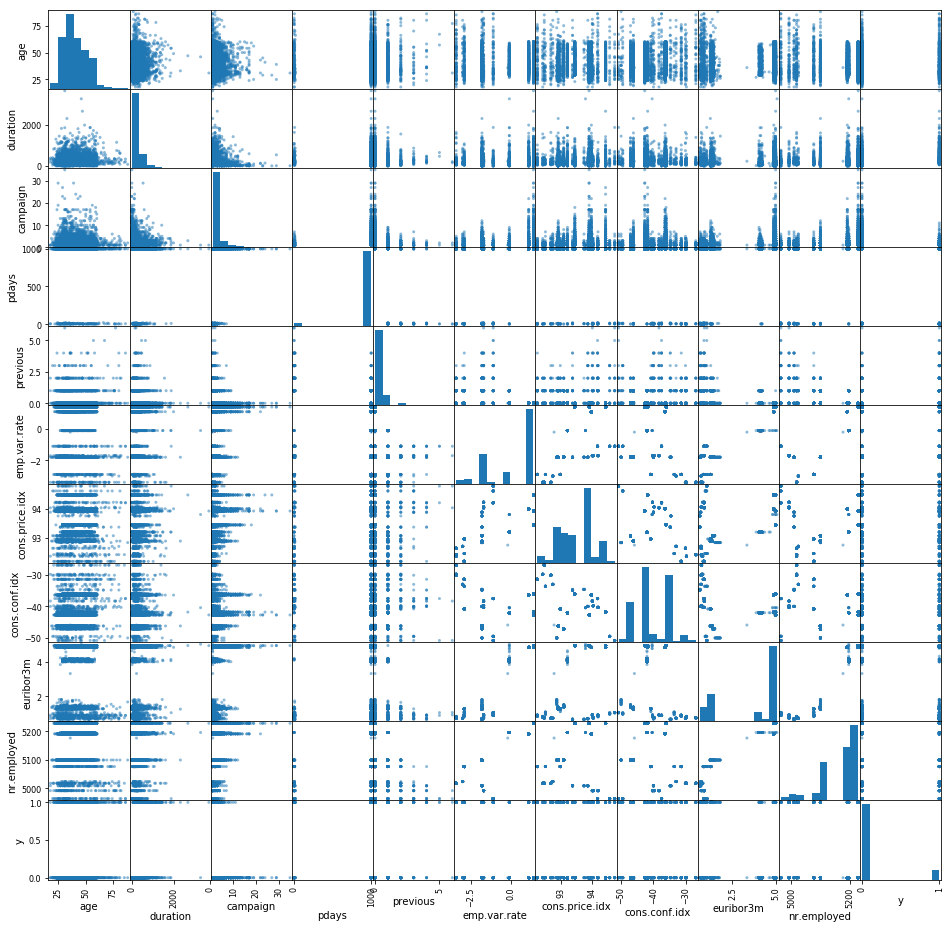

In [19]:
from pandas.plotting import scatter_matrix
graf = scatter_matrix(df, figsize=(16, 16) )

In [20]:
pd.crosstab(df.education, df.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


Text(0,0.5,'Frecuencia')

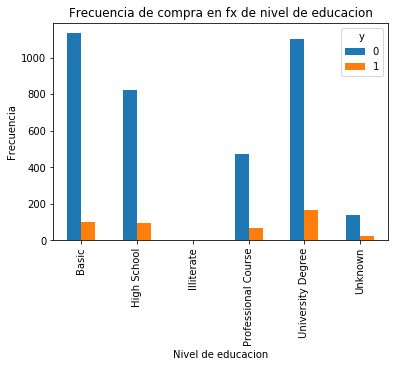

In [21]:
pd.crosstab(df.education, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en fx de nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia")


Text(0,0.5,'Proporcion de clientes')

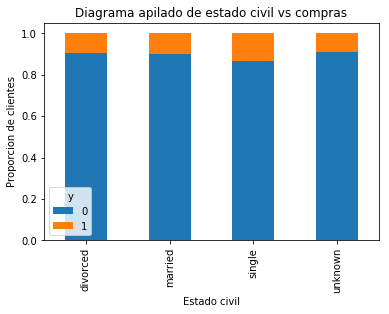

In [22]:
table = pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado de estado civil vs compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Text(0,0.5,'Proporcion de clientes')

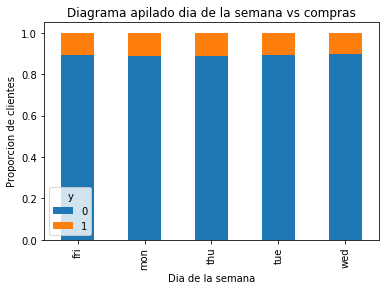

In [23]:
table = pd.crosstab(df.day_of_week,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado dia de la semana vs compras")
plt.xlabel("Dia de la semana")
plt.ylabel("Proporcion de clientes")

Text(0,0.5,'Proporcion de clientes')

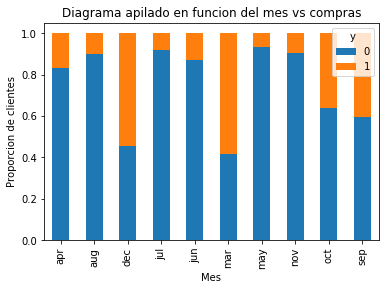

In [24]:
table = pd.crosstab(df.month,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado en funcion del mes vs compras")
plt.xlabel("Mes")
plt.ylabel("Proporcion de clientes")

Text(0,0.5,'Frecuencia')

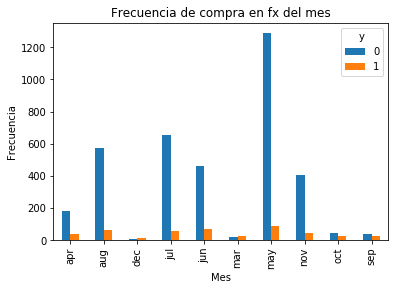

In [25]:
pd.crosstab(df.month, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en fx del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")

Text(0,0.5,'Clientes')

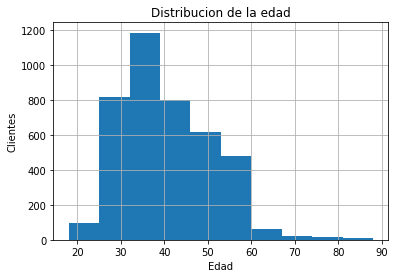

In [26]:
df.age.hist()
plt.title("Distribucion de la edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")

Text(0,0.5,'Frecuencia')

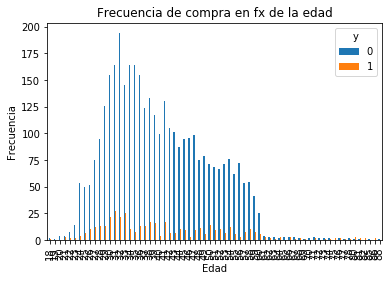

In [27]:
pd.crosstab(df.age, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en fx de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

Text(0,0.5,'Frecuencia')

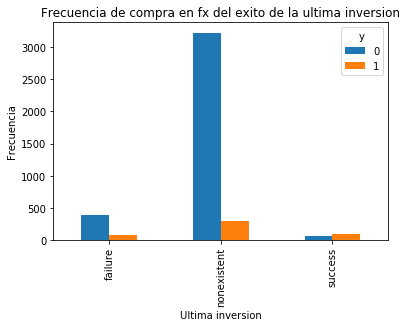

In [28]:
pd.crosstab(df.poutcome, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en fx del exito de la ultima inversion")
plt.xlabel("Ultima inversion")
plt.ylabel("Frecuencia")

# La selección de variables del dataset para el modelo logístico

## Conversion de variables categoricas a dummies

In [29]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [30]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [31]:
for category in categories:
    cat_list = "cat_"+category
    cat_dummies = pd.get_dummies(df[category], prefix=cat_list)
    df = df.join(cat_dummies)

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_High School',
       'cat_education_Illiterate', 'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loa

In [34]:
data_vars = df.columns.values.tolist()

In [35]:
to_keep = (v for v in data_vars if v not in categories)

In [36]:
df_bank = df[to_keep]

In [37]:
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [38]:
df_bank_vars = df_bank.columns.values.tolist()

In [39]:
Y = ['y']
X = (v for v in df_bank_vars if v not in Y)

### Seleccion de rasgos para el modelo

In [40]:
n = 12

In [41]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
rfe = RFE(lr, n)

In [44]:
rfe = rfe.fit(df_bank[X],df_bank[Y].values.ravel())

In [45]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [46]:
print(rfe.ranking_)

[34 42 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 46 19 44
 31 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 47 37 28 43 29 11  1  7  1]


In [47]:
z=zip(df_bank_vars,rfe.support_,rfe.ranking_)

In [48]:
list(z)

[('age', False, 34),
 ('duration', False, 42),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 22),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 36),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 38),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 5),
 ('cat_job_services', False, 30),
 ('cat_job_student', False, 32),
 ('cat_job_technician', False, 12),
 ('cat_job_unemployed', False, 46),
 ('cat_job_unknown', False, 19),
 ('cat_marital_divorced', False, 44),
 ('cat_marital_married', False, 31),
 ('cat_marital_single', False, 50),
 ('cat_marital_unknown', False, 26),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 48),
 ('cat_education_Illiterate', False, 21),
 ('cat_education_Professional

In [49]:
cols_1 = ["previous", "euribor3m","cat_job_blue-collar","cat_job_retired", "cat_month_aug", "cat_month_dec", "cat_month_jul",
         "cat_month_jun", "cat_month_mar","cat_month_nov","cat_day_of_week_wed","cat_poutcome_nonexistent"]

In [50]:
len(cols_1)

12

In [51]:
X = df_bank[cols_1]
Y = df_bank["y"]

# Implementación del modelo con statmodel.api

In [52]:
import statsmodels.api as sm

In [53]:
logit_model = sm.Logit(Y, X)

In [54]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:                  0.1554
Time:                        13:20:57   Log-Likelihood:                -1201.8
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                 6.449e-88
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
previous                    -0.1229      0.070     -1.755      0.079      -0.260       0.014
euribor3m                   -0.6049      0.038    -15.788      0.000      -0.680      -0.530
cat_job_blue-collar         -0.5032      0.152     -3.314      0.001      -0.801      -0.206
cat_job_retired              0.2235      0.219      1.021      0.307      -0.206       0.653
cat_month_aug                0.6048      0.176      3.437      0.001       0.260       0.950
cat_month_dec                1.1358      0.449      2.528      0.011       0.255       2.016
cat_month_jul                1.0327      0.191      5.407      0.000       0.658       1.407
cat_month_jun                1.0775      0.175      6.149      0.000       0.734       1.421
cat_month_mar                1.6448      0.314      5.241      0.000       1.030       2.260
cat_month_nov                0.3828      0.195      1.963      0.050       0.001       0.765
cat_day_of_week_wed         -0.0649      0.139     -0.466      0.641      -0.338       0.208
cat_poutcome_nonexistent    -0.7753      0.122     -6.349      0.000      -1.015      -0.536
============================================================================================
"""

In [56]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.155     
Dependent Variable:     y                  AIC:                2427.6025 
Date:                   2019-07-16 13:20   BIC:                2503.4828 
No. Observations:       4119               Log-Likelihood:     -1201.8   
Df Model:               11                 LL-Null:            -1422.9   
Df Residuals:           4107               LLR p-value:        6.4492e-88
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                 -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m                -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
cat_job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
cat_job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
cat_month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
cat_month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
cat_month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
cat_month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
cat_month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
cat_month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
cat_day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
cat_poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=========================================================================

"""

# Implementación del modelo con sklearn

In [57]:
from sklearn import linear_model

In [58]:
logit_model = linear_model.LogisticRegression()

In [59]:
logit_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
logit_model.score(X,Y)

0.8963340616654528

In [61]:
pd.DataFrame(zip(X.columns,np.transpose(logit_model.coef_)))

,0,1
0,previous,[0.5076571353702829]
1,euribor3m,[-0.546496133920961]
2,cat_job_blue-collar,[-0.3591553622507818]
3,cat_job_retired,[0.35603838876396016]
4,cat_month_aug,[0.6253983085949565]
5,cat_month_dec,[1.1822172985978154]
6,cat_month_jul,[0.9622633626968825]
7,cat_month_jun,[1.0543179248209773]
8,cat_month_mar,[1.6306366297798072]
9,cat_month_nov,[0.45195768179106927]


# Validación del modelo y evaluación del mismo

In [62]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [64]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
probs = lm.predict_proba(X_test)

In [66]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [67]:
predictions = lm.predict(X_test)

In [68]:
prob = probs[:,1]

In [69]:
df_prob = pd.DataFrame(prob)

In [70]:
df_prob.count()

0    1236
dtype: int64

In [71]:
df_prob[df_prob[0] < 0.1].count()

0    846
dtype: int64

In [72]:
df_prob.head()

,0
0,0.045371
1,0.162373
2,0.067554
3,0.062144
4,0.041582


In [73]:
threshold = 0.1
df_prob["prediction"] = np.where(df_prob[0] >threshold, 1, 0)
df_prob.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [74]:
df_prob.groupby("prediction").count()

,0
prediction,
0,846
1,390


In [75]:
threshold = 0.15
df_prob["prediction"] = np.where(df_prob[0] >threshold, 1, 0)
df_prob.groupby("prediction").count()

,0
prediction,
0,905
1,331


In [76]:
threshold = 0.05
df_prob["prediction"] = np.where(df_prob[0] >threshold, 1, 0)
df_prob.groupby("prediction").count()

,0
prediction,
0,504
1,732


In [77]:
from sklearn import metrics

In [78]:
metrics.accuracy_score(Y_test,predictions)

0.9004854368932039

# Validación cruzada con Python

In [79]:
from sklearn.cross_validation import cross_val_score

In [80]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=10)

In [81]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [82]:
scores.mean()

0.8943884240990478

In [83]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=12)
scores.mean()

0.8951165883384306

In [84]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=8)
scores.mean()

0.8955991422088645